# Introduction

<center><img src="https://www.gov.br/secretariageral/pt-br/noticias/2017/junho/imagens/tele.jpg" height=400></center>


This Exploratory analysis aims to find relevant insights on customer churn at a telecom company.

Customer Churn is defined as the metrics of the customers that cancelled a service after some period of time. 

It is considered an important analysis to raise better strategies to improve the relationship and build loyalty to service.

# Import Statements

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Initial Exploration

In [35]:
#Viz setup
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (8, 5)

#Loading dataset
df = pd.read_csv('Telco_Customer_Churn.csv')

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing and Cleaning

In [37]:
# Check missing values
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [38]:
# Replace empty strings or spaces with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

In [39]:
#Convert totalcharges column to numeric, coercing errors to NaN
df['totalcharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [40]:
# Drop rows where TotalCharges is missing
df = df.dropna(subset=["TotalCharges"])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [42]:
# Map target variable to binary (Yes = 1, No = 0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Exploratory Data Analysis (EDA)

In [43]:
# Churn rate
churn_rate = df["Churn"].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

# General statistics
df.describe(include="all").T.head(10)


Churn Rate: 26.58%


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


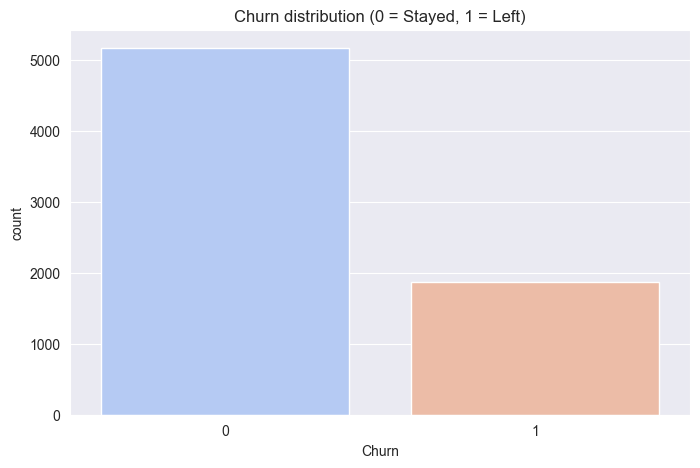

The percentage of customers who churned is 26.58%


In [44]:
sns.countplot(x="Churn", hue="Churn", data=df, palette="coolwarm", legend=False)
plt.title("Churn distribution (0 = Stayed, 1 = Left)")
plt.show()

print('The percentage of customers who churned is {:.2f}%'.format(df['Churn'].mean()*100))


## Factors that contributed to customer churn

### **Churn and contract type**

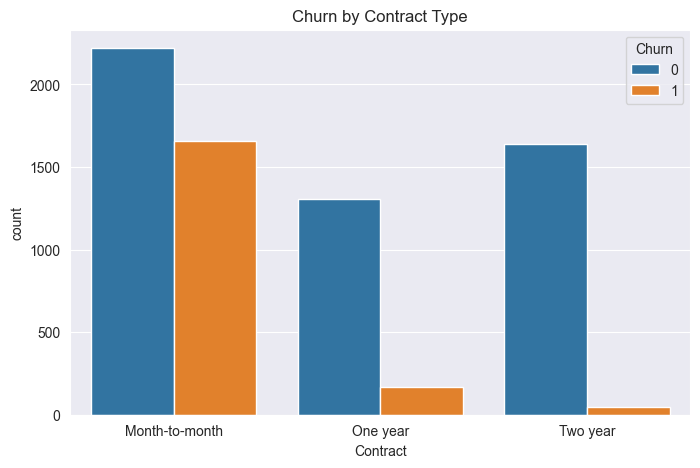

In [45]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


In [46]:
print('The percentage of customers with month-to-month contract who churned is {:.2f}%'.format(df[df['Contract']=='Month-to-month']['Churn'].mean()*100))
print('The percentage of customers with one year contract who churned is {:.2f}%'.format(df[df['Contract']=='One year']['Churn'].mean()*100))
print('The percentage of customers with two year contract who churned is {:.2f}%'.format(df[df['Contract']=='Two year']['Churn'].mean()*100))

The percentage of customers with month-to-month contract who churned is 42.71%
The percentage of customers with one year contract who churned is 11.28%
The percentage of customers with two year contract who churned is 2.85%


It is notable the low rate of churn on customer with longer term contracts.

### **Churn and payment method**

The customers with electronic type of payment method were the highest rate of churn, while the automatic payments became the lowest rate of churn.


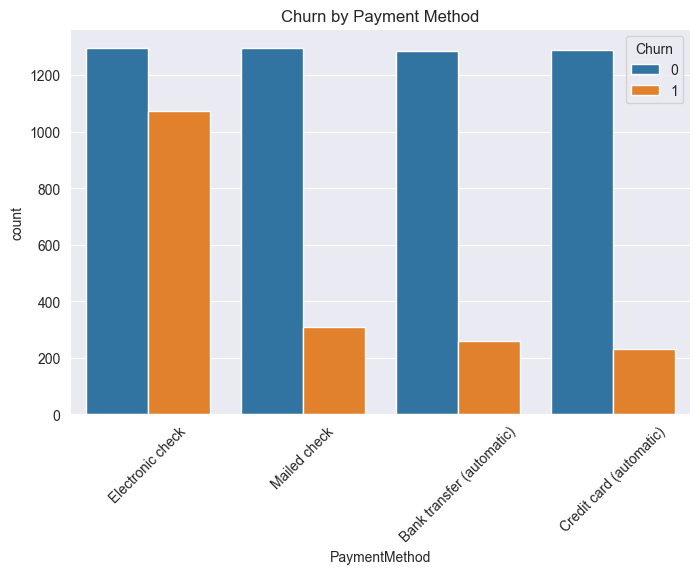

In [47]:
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

### **Churn and internet service**


Churn rate was considerably lower on customers without internet service compared to the other two.

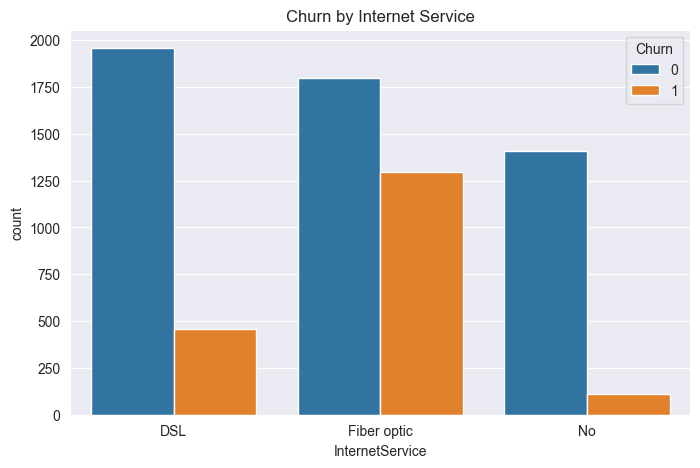

In [48]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service")
plt.show()


### **Tenure distribution by churn**

Tenure refers to time (in months) a customer remained in the service.

The chart shows that the largest amount of customers that cancelled their services were whom stayed in for a considerable smaller amount of time, with median of 10 months of tenure, compared to a median of 38 months on the customers who stayed loyal.

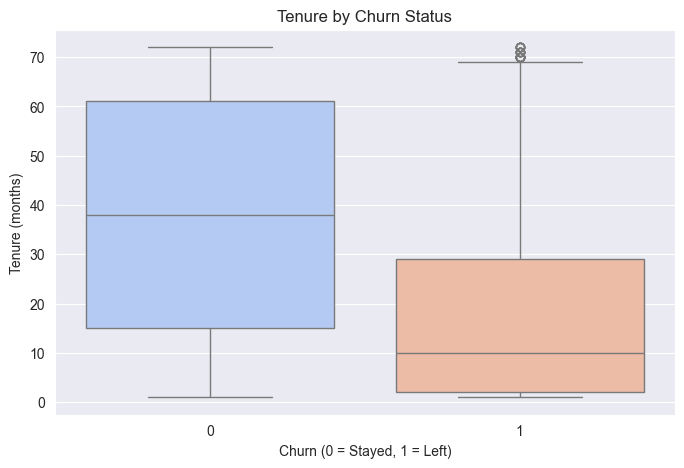

In [49]:
sns.boxplot(x="Churn", y="tenure", hue="Churn", data=df, palette="coolwarm", legend=False)
plt.title("Tenure by Churn Status")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Tenure (months)")
plt.show()


# Correlation Analysis


This plot shows the relationship between two features by measuring strength and direction on numerical variables.

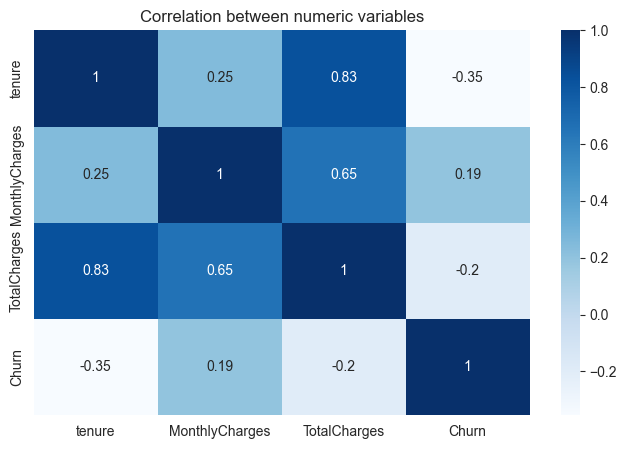

In [50]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation between numeric variables")
plt.show()


### Key insights on this plot
 - Customers with higher tenure are less likely to churn
 - Monthly charges are usually higher with customers with higher tenure

# Conclusion

- This analysis shows that some of the important features to track reasons for customer churn are:
    - Tenure (Amount of time customer was enrolled on services)
    - Type of charge
    - Amount of charge



- Some of these features are key to facilitate strategies to reduce churn rate, which could include:
    - Promoting long term tenure such as higher discount on longer plans.
    - Offering customer a discount for a specific amount of time when one tries to cancel services.
    - Tracking and quantifying reasons of cancellation through customer service.

### Disclaimer
This project was made for educational purposes only. All credits on original data goes to original provider.